In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer


D:\Python3.14\Lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
from sklearn.feature_extraction import DictVectorizer

def dictvec():
    """
    字典数据抽取
    :return: None
    """
    # 实例化
    # sparse改为True, 输出的是每个不为零位置的坐标, 稀疏矩阵可以节省存储空间
    # 矩阵中存在大量的0, sparse存储只记录非零位置, 节省空间的作用
    # Vectorizer中文含义是矢量器的含义
    dict1 = DictVectorizer(sparse=True)  # 把sparse改为True看看

    # 每个样本都是一个字典, 有三个样本
    # 调用fit_transform
    data = dict1.fit_transform([{'city': '北京', 'temperature': 100},
                                {'city': '上海', 'temperature': 60},
                                {'city': '深圳', 'temperature': 30}])

    print(data)
    print('-' * 50)

    # 字典中的一些类别数据, 分别进行转换成特征
    # 注意：sklearn 1.0+ 版本使用 get_feature_names_out，旧版本使用 get_feature_names
    print(dict1.get_feature_names_out())
    print('-' * 50)

    print(dict1.inverse_transform(data))  # 去看每个特征代表的含义, 逆转回去

    return None

# 调用函数
if __name__ == '__main__':
    dictvec()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': np.float64(1.0), 'temperature': np.float64(100.0)}, {'city=上海': np.float64(1.0), 'temperature': np.float64(60.0)}, {'city=深圳': np.float64(1.0), 'temperature': np.float64(30.0)}]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

def couvec():
    # 实例化CountVectorizer
    # max_df, min_df整数: 指每个词的所有文档词频数不小于最小值, 出现该词的文档数目小于等于max_df
    # max_df, min_df小数(0-1之间的): 某个词的出现的次数/所有文档数量
    # min_df=2
    # 默认会去除单个字母的单词, 默认认为这个词对整个样本没有影响, 认为其没有语义
    vector = CountVectorizer(min_df=2)

    # 调用fit_transform输入并转换数据
    res = vector.fit_transform(
        ["life is short,i like python life",
         "life is too long,i dislike python",
         "life is short"]
    )

    # 打印结果, 把每个词都分离了
    print(vector.get_feature_names_out())
    print('-'*50)
    print(res)
    print('-'*50)
    print(type(res))

    # 对照feature_names, 标记每个词出现的次数
    print('-'*50)
    print(res.toarray()) # 稀疏矩阵转换为数组
    print('-'*50)

    # 拿每个样本里的特征进行显示
    print(vector.inverse_transform(res))

# 调用函数
couvec()

['is' 'life' 'python' 'short']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 0)	1
  (2, 3)	1
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[1 2 1 1]
 [1 1 1 0]
 [1 1 0 1]]
--------------------------------------------------
[array(['life', 'is', 'short', 'python'], dtype='<U6'), array(['life', 'is', 'python'], dtype='<U6'), array(['life', 'is', 'short'], dtype='<U6')]


In [6]:
def countvec():
    """
    对文本进行特征值化，单个汉字单个字母不统计，因为单个汉字字母没有意义
    :return: None
    """
    # 实例化
    cv = CountVectorizer()

    # 输入数据：注意这里的中文句子包含标点和空格
    data = cv.fit_transform(["人生苦短，我喜欢 python python", "人生漫长，不用 python"])

    print(cv.get_feature_names_out())
    print('-'*50)
    print(data) # 稀疏存储，只记录非零位置
    print('-'*50)
    print(data.toarray()) # 转换为常规数组

    return None

# 统一调用
if __name__ == '__main__':
    # dictvec()
    # couvec_english()
    countvec()
    #从我喜欢可以看出来中文不方便分为分词

['python' '不用' '人生漫长' '人生苦短' '我喜欢']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (2, 5)>
  Coords	Values
  (0, 3)	1
  (0, 4)	1
  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
--------------------------------------------------
[[2 0 0 1 1]
 [1 1 1 0 0]]


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba

def cutword():
    """
    通过jieba对中文进行分词
    :return: c1, c2, c3 (分词后并用空格拼接的字符串)
    """
    # 1. 使用 jieba.cut 进行分词 (返回的是生成器)
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")
    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")
    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 2. 将生成器转换为列表 (这一步方便查看，实际开发中可以直接 join)
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)

    # 3. 将列表转换为字符串，关键点：用空格 ' ' 隔开
    # CountVectorizer 默认识别空格作为词的分隔符
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3

def hanzivec():
    """
    中文特征值化
    :return: None
    """
    # 1. 获取处理好的、带空格的中文字符串
    c1, c2, c3 = cutword()

    print("--- 分词后的效果 ---")
    print(c1)
    print(c2)
    print(c3)
    print('-' * 50)

    # 2. 实例化 CountVectorizer
    # 因为现在文本里已经有空格了，它就能正常识别出词语了
    cv = CountVectorizer()

    # 3. 传入数据进行 fit 和 transform
    data = cv.fit_transform([c1, c2, c3])

    # 4. 打印特征名称 (看看提取出了哪些词)
    print("--- 提取出的特征词 ---")
    print(cv.get_feature_names_out())

    # 5. 打印最终的统计矩阵 (转为数组查看)
    print("\n--- 词频统计矩阵 ---")
    print(data.toarray())

    return None

# 调用主函数
if __name__ == '__main__':
    hanzivec()

--- 分词后的效果 ---
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
--------------------------------------------------
--- 提取出的特征词 ---
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '这样']

--- 词频统计矩阵 ---
[[0 0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 1]
 [1 1 0 0 4 3 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 0]]


所以需要避免在所有文件中高频出现的词，仅仅分析在部分文件出现频率很高的词

In [8]:
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# --- 第一部分：Pandas 数据构造演示 ---
def data_demo():
    print("--- Pandas 数据构造 ---")
    # 案例 1：重复字符与随机数
    df_obj = pd.DataFrame({
        'data1': ['a'] * 4 + ['b'] * 4,
        'data2': np.random.randint(0, 4, 8)
    })
    print(df_obj)

    # 案例 2：空值与字符串列表
    df_obj1 = pd.DataFrame({
        'data1': [np.nan] * 4,
        'data2': list('1235')
    })
    print(df_obj1)
    print('-' * 50)

# --- 第二部分：字典特征提取 ---
def dictvec():
    """
    字典数据抽取 (One-Hot编码)
    """
    print("--- 字典特征提取 (DictVectorizer) ---")
    # sparse=True (默认): 返回稀疏矩阵，节省内存
    dict1 = DictVectorizer(sparse=True)

    # 调用fit_transform
    data = dict1.fit_transform([
        {'city': '北京', 'temperature': 100},
        {'city': '上海', 'temperature': 60},
        {'city': '深圳', 'temperature': 30}
    ])

    print(dict1.get_feature_names_out())
    print(data) # 打印稀疏矩阵坐标
    # print(data.toarray()) # 如果想看完整二维数组，取消注释
    print(dict1.inverse_transform(data))
    print('-' * 50)

# --- 第三部分：英文文本特征提取 ---
def couvec_english():
    """
    英文文本特征提取 (统计词频)
    """
    print("--- 英文文本特征提取 (CountVectorizer) ---")
    # min_df=2: 过滤掉只出现过1次的词
    vector = CountVectorizer(min_df=2)

    res = vector.fit_transform([
        "life is short,i like python life",
        "life is too long,i dislike python",
        "life is short"
    ])

    print(vector.get_feature_names_out())
    print(res.toarray())
    print('-' * 50)

# --- 第四部分：中文分词工具 ---
def cutword():
    """
    使用 jieba 对中文进行分词，并用空格拼接
    """
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")
    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")
    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 转换为列表并用空格连接成字符串
    c1 = ' '.join(list(con1))
    c2 = ' '.join(list(con2))
    c3 = ' '.join(list(con3))

    return c1, c2, c3

# --- 第五部分：中文词频统计 ---
def hanzivec():
    """
    中文特征值化 (CountVectorizer)
    """
    print("--- 中文词频统计 (CountVectorizer + Jieba) ---")
    c1, c2, c3 = cutword()

    cv = CountVectorizer()
    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())
    print(data.toarray())
    print('-' * 50)

# --- 第六部分：TF-IDF 关键词提取 (新增) ---
def tfidfvec():
    """
    中文特征值化，计算 TF-IDF 值
    TF-IDF = Term Frequency * Inverse Document Frequency
    作用：评估一个词对一个文件集或一个语料库中的其中一份文件的重要程度
    """
    print("--- TF-IDF 特征提取 (TfidfVectorizer) ---")
    c1, c2, c3 = cutword()

    # 实例化 TfidfVectorizer
    # smooth_idf=True: 防止除以零错误，相当于在文档频率上加1
    tf = TfidfVectorizer(smooth_idf=True)

    data = tf.fit_transform([c1, c2, c3])

    print("特征词列表：")
    print(tf.get_feature_names_out())

    print("\nTF-IDF 权重矩阵：")
    print(data.toarray())
    return None

# --- 主程序入口 ---
if __name__ == '__main__':
    # 你可以根据需要取消注释来运行特定的函数
    # data_demo()
    # dictvec()
    # couvec_english()
    # hanzivec()
    tfidfvec() # 运行最新的 TF-IDF 代码

--- TF-IDF 特征提取 (TfidfVectorizer) ---
特征词列表：
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '这样']

TF-IDF 权重矩阵：
[[0.         0.         0.21821789 0.         0.         0.
  0.43643578 0.         0.         0.         0.         0.
  0.21821789 0.         0.21821789 0.         0.         0.
  0.         0.21821789 0.21821789 0.         0.43643578 0.
  0.21821789 0.         0.43643578 0.21821789 0.         0.
  0.         0.21821789 0.21821789 0.         0.         0.        ]
 [0.         0.         0.         0.2410822  0.         0.
  0.         0.2410822  0.2410822  0.2410822  0.         0.
  0.         0.         0.         0.         0.         0.2410822
  0.55004769 0.         0.         0.         0.         0.2410822
  0.         0.         0.         0.         0.48216441 0.
  0.         0.         0.         0.         0.2410822  0.2410822 ]


In [9]:
from sklearn.preprocessing import MinMaxScaler

def mm():
    """
    归一化处理
    :return: None
    """
    # 归一化缺点 容易受极值的影响
    # feature_range 代表特征值范围, 一般设置为(0,1),或者(-1,1),默认是(0,1)
    mm = MinMaxScaler(feature_range=(0, 1))

    # 1. fit_transform: 既计算最小值最大值(fit)，又进行转换(transform)
    # 这里模拟的是"训练集"数据：3个样本，4个特征
    data = mm.fit_transform([[90, 2, 10, 40],
                             [60, 4, 15, 45],
                             [75, 3, 13, 46]])

    print(data)
    print('-'*50)

    # 2. transform: 直接使用之前计算好的最小值和最大值进行转换
    # 这里模拟的是"测试集"数据：注意，这里不需要 fit 了
    out = mm.transform([[1, 2, 3, 4],
                        [6, 5, 8, 7]])

    print(out)

    return None
    # transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值

# 调用函数
if __name__ == '__main__':
    mm()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


In [10]:
from sklearn.preprocessing import StandardScaler

def stand():
    """
    标准化缩放
    特点：处理后的数据均值为0，方差为1
    :return: None
    """
    # 1. 实例化 StandardScaler
    std = StandardScaler()

    # 2. 调用 fit_transform
    # 输入数据：3个样本，每个样本3个特征
    data = std.fit_transform([[1., -1., 3.],
                              [2., 4., 2.],
                              [4., 6., -1.]])

    # 3. 打印处理后的矩阵
    print("--- 标准化后的数据 ---")
    print(data)

    # 4. 打印统计信息
    print('-' * 50)
    print(f"均值 (mean): {std.mean_}")   # 每一列的原始均值
    print('-' * 50)
    print(f"方差 (var): {std.var_}")     # 每一列的原始方差

    # 打印处理的样本数 (n_samples_seen_)
    print(f"样本数量: {std.n_samples_seen_}")

    return None

# 调用函数
if __name__ == '__main__':
    stand()

--- 标准化后的数据 ---
[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
均值 (mean): [2.33333333 3.         1.33333333]
--------------------------------------------------
方差 (var): [1.55555556 8.66666667 2.88888889]
样本数量: 3.0


In [11]:
from sklearn.impute import SimpleImputer
import numpy as np

def im():
    """
    缺失值处理
    :return: None
    """
    # NaN, nan, 缺失值必须是这种形式
    # 如果数据中是 '?' 或其他符号，必须先用 replace 替换成 np.nan

    # 实例化 SimpleImputer
    # missing_values=np.nan: 指定要替换的值是 NaN
    # strategy='mean': 填补策略，这里使用"平均值"填补 (也可以是 'median' 中位数, 'most_frequent' 众数)
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    # 输入数据：第2个样本的第1列是空的 (np.nan)
    # 第1列数据: 1, nan, 7, 3 -> 平均值是 (1+7+3)/3 = 3.66...
    data = im.fit_transform([[1, 2],
                             [np.nan, 3],
                             [7, 6],
                             [3, 2]])

    print(data)

    return None

# 调用函数
if __name__ == '__main__':
    im()#还有众数和中位数

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


In [12]:
from sklearn.feature_selection import VarianceThreshold

def var():
    """
    特征选择-删除低方差的特征
    :return: None
    """
    # 默认只删除方差为0, threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    # 输入数据：3个样本，4个特征
    # 观察数据：
    # 第1列：全是0 -> 方差为0 -> 应该被删除
    # 第2列：2, 1, 1 -> 有变化 -> 保留
    # 第3列：0, 4, 1 -> 有变化 -> 保留
    # 第4列：全是3 -> 方差为0 -> 应该被删除
    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])

    print(data)

    # 获得剩余的特征的列编号
    # 注意：原代码中单词拼写有误 (surport -> support)
    print('The surport is %s' % var.get_support(True))

    return None

# 调用函数
if __name__ == '__main__':
    var()

[[2 0]
 [1 4]
 [1 1]]
The surport is [1 2]


In [13]:
from sklearn.decomposition import PCA
import numpy as np

def pca():
    """
    主成分分析进行特征降维
    :return: None
    """
    # n_components: 小数 0~1 90% 业界选择 90~95%

    # 当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。
    # 方差比例是指 得到输出的每一列的方差值和除以原有数据方差之和。
    # 具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。

    # n_components 如果是整数   减少到的特征数量
    # 原始数据方差
    original_value = np.array([[2, 8, 4, 5],
                               [6, 3, 0, 8],
                               [5, 4, 9, 1]])

    # 打印最初数据的方差总和
    print(np.var(original_value, axis=0).sum())
    print('-' * 50)

    # 实例化 PCA, n_components=0.9 表示保留 90% 的信息量
    pca = PCA(n_components=0.9)

    # 调用 fit_transform
    data = pca.fit_transform(original_value)

    print(data)
    print(type(data))

    # 计算data的方差
    print(np.var(data, axis=0).sum())

    print('-' * 50)

    # 打印解释方差比例 (每个新特征贡献了多少比例的信息)
    print(pca.explained_variance_ratio_)

    # 计算data的方差占总方差的比例 (应该接近或略大于 0.9)
    print(pca.explained_variance_ratio_.sum())

    return None

# 调用函数
if __name__ == '__main__':
    pca()

29.333333333333336
--------------------------------------------------
[[-1.28620952e-15  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
29.333333333333332
--------------------------------------------------
[0.75 0.25]
1.0


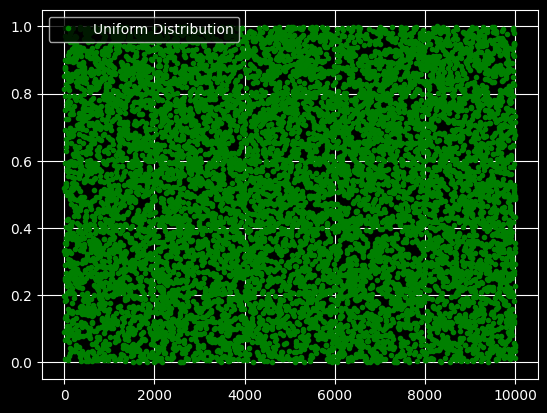

In [14]:
from matplotlib import pyplot as plt
import numpy as np  # 假设之前已经导入了 numpy

# 1. 生成数据
# np.random.rand 返回 [0, 1) 之间的随机浮点数，服从均匀分布
x = np.random.rand(10000)  # 生成 10000 个随机数

# 生成 x 轴的坐标，从 0 到 9999
t = np.arange(len(x))

# 2. 绘制图形
# 'g.' : g表示绿色(green)，.表示点(dot)，即画绿色的点状图
plt.plot(t, x, 'g.', label="Uniform Distribution")

# 3. 设置图例位置
plt.legend(loc="upper left")

# 4. 显示网格
plt.grid()

# 5. 展示图像
plt.show()